In [1]:
from typing import List

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from modules.asset import Asset


In [2]:
start_date = "2015-01-01"
end_date = "2020-01-01"
tick_type = "Close"

swiss_re = Asset(
    asset_name="SwissRe",
    tick_name="SREN.SW",
    time_period=(start_date, end_date),
    value_type=tick_type
)
bitcoin = Asset(
    asset_name="Bitcoin",
    tick_name="BTC-USD",
    time_period=(start_date, end_date),
    value_type=tick_type
)

/Users/emiliomaddalena/Documents/github/volatility-forecasting/modules/asset.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(self.tick_name, start=self.start_date, end=self.end_date)
[*********************100%***********************]  1 of 1 completed
/Users/emiliomaddalena/Documents/github/volatility-forecasting/modules/asset.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(self.tick_name, start=self.start_date, end=self.end_date)
[*********************100%***********************]  1 of 1 completed


In [3]:
def plot_series(asset: Asset, series_types: List[str] | str, fig_size: tuple = (10, 7)) -> None:
    """Plot the time series data for a list of assets, individual plots."""
    color_sequence = ['k', 'r', 'b', 'g', 'm', 'c', 'y']
    if isinstance(series_types, str):
        series_types = [series_types]

    plt.figure(figsize=fig_size)
    for i, series_type in enumerate(series_types):
        series = asset.__getattribute__(series_type)
        plt.plot(series.index, series, color=color_sequence[i], label=series_type)
        years = pd.date_range(start=series.index[0], end=series.index[-1], freq="YS").year
        years = np.unique(np.concatenate(([series.index[0].year], years, [series.index[-1].year + 1])))
        ticks = [pd.Timestamp(year=year, month=1, day=1) for year in years]
    plt.title(f"{asset.asset_name} ({asset.tick_name})")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.xlim([series.index[0], series.index[-1]])
    plt.xticks(ticks=ticks, labels=[str(year) for year in years], rotation=45)
    plt.legend()
    plt.grid()

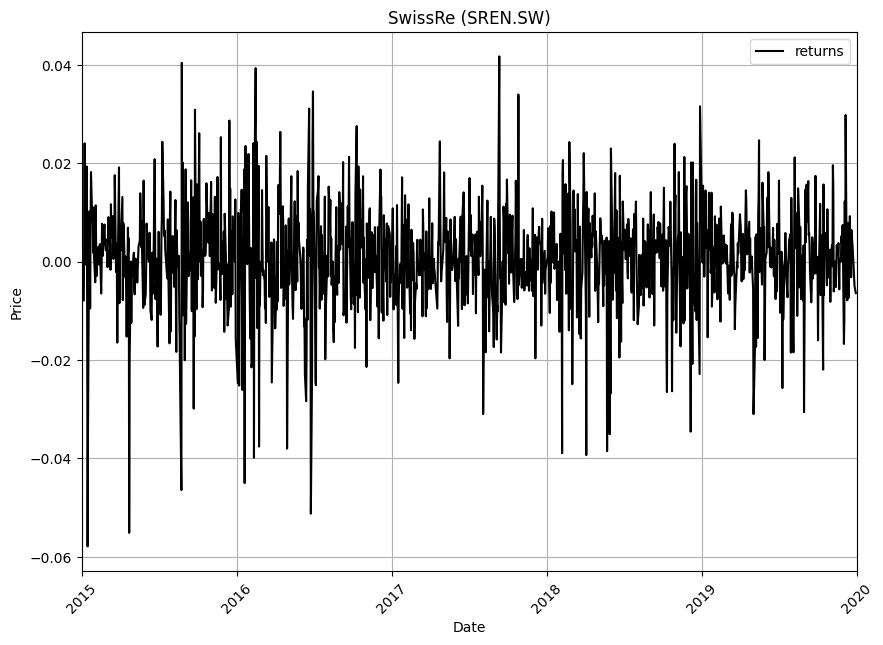

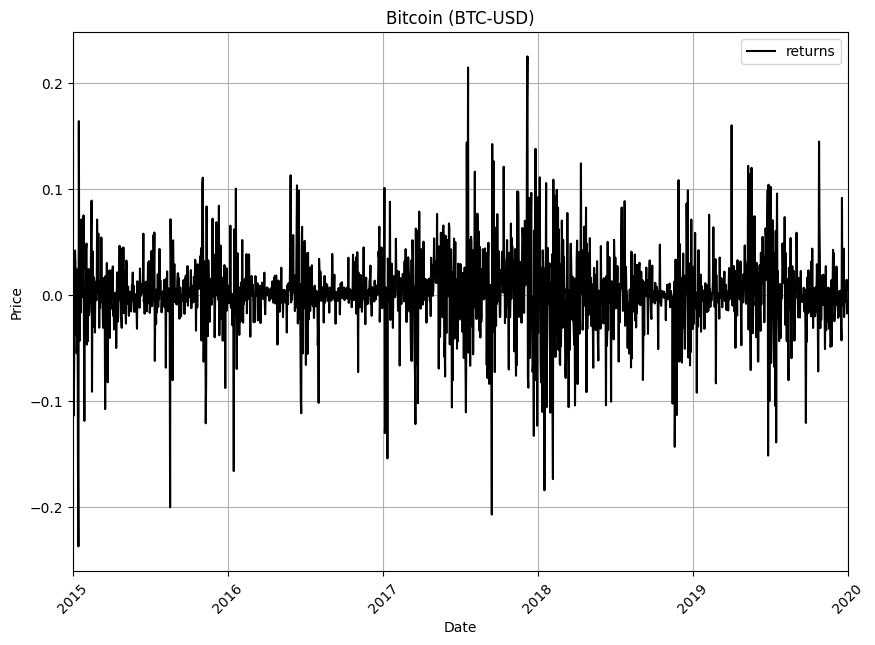

In [4]:
plot_series(swiss_re, "returns")
plot_series(bitcoin, "returns")

In [5]:
swiss_re.compute_realized_volatility(window=10, store=True)
bitcoin.compute_realized_volatility(window=10, store=True)

Ticker,BTC-USD
Date,
2015-01-02,NaN
2015-01-03,NaN
2015-01-04,NaN
2015-01-05,NaN
2015-01-06,NaN
...,...
2019-12-27,0.001123
2019-12-28,0.000290
2019-12-29,0.000291


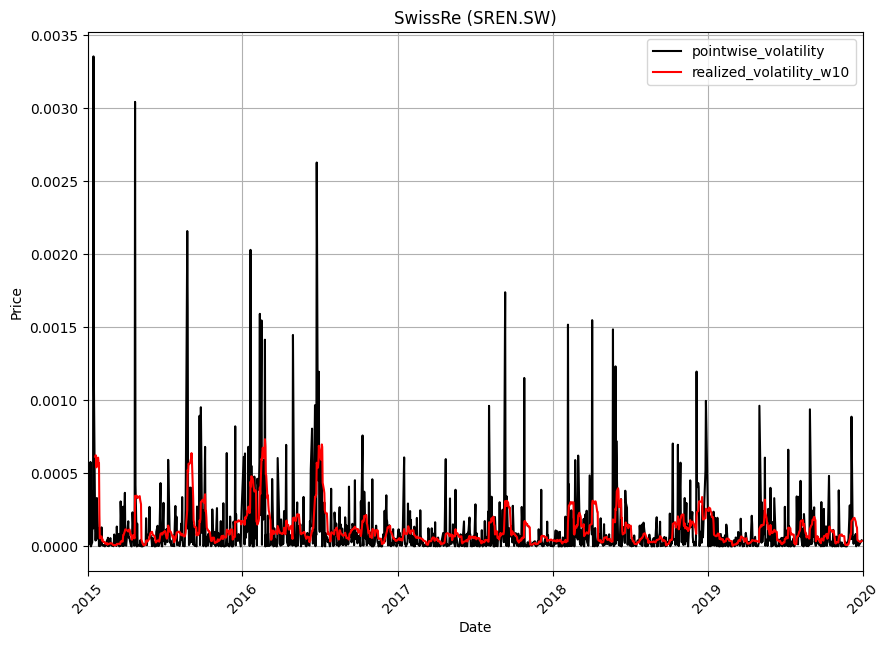

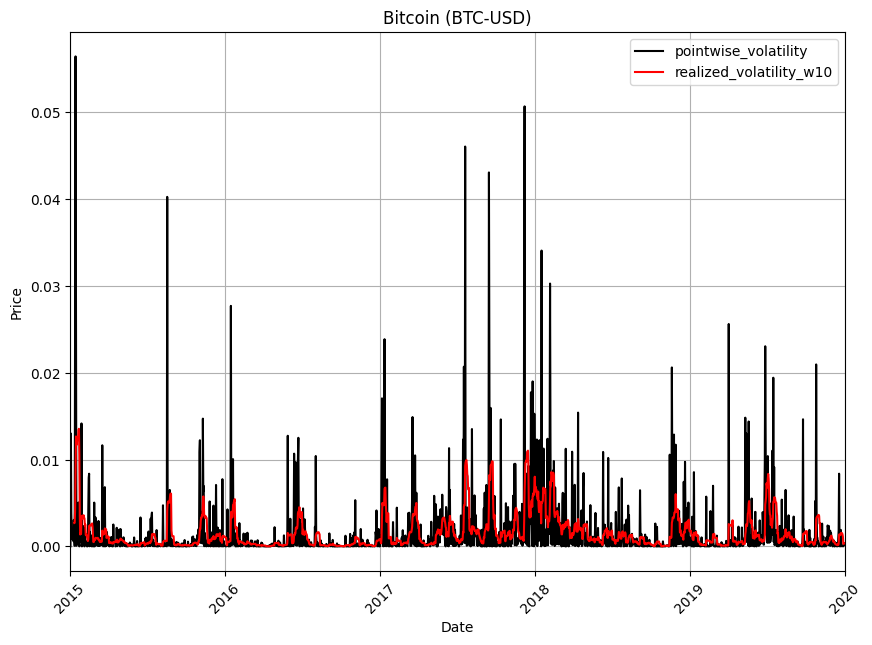

In [8]:
plot_series(swiss_re, ["pointwise_volatility", "realized_volatility_w10"])
plot_series(bitcoin, ["pointwise_volatility", "realized_volatility_w10"])